# Лабораторная работа №3: Обучение линейной и логистической регрессии. Подсчет метрик

Задание: найти датасет ( можно посмотреть на kaggle, PapersWithCode или sklearn), обучить на нем линейную или логистическую регрессию. Так же необходимо посчитать метрики у обученной модели.

Я выбрала встроенный в sklearn "Breast cancer wisconsin (diagnostic) dataset", так как он хорошо подходит для обучения как линейной регрессии, так и логистической (классификация).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# импортируем данные и поместим их в переменную cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Посмотрим на описание датасета:

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Преобразуем данные в формат датафрейма. Для этого передадим функции pd.DataFrame() массив признаков cancer.data. Название столбцов возьмем из cancer.feature_names. Добавим целевую переменную из cancer.tanget и назовем ее так же, ‘target’.

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target

# посмотрим на первые пять наблюдений
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Посмотрим, какой цифрой обозначается доброкачественная опухоль, а какой — злокачественная.

In [ ]:
df.loc[df['target'] == 0].shape

(212, 31)

Таким образом, получили датасет, содержащий информацию о 569 образованиях, которые могут быть злокачественными (раком груди) или доброкачественными.

Для каждой из 10 базовых характеристик опухоли (таких как, радиус, текстура, периметр, площадь и т.д.) рассчитаны три значения (среднее арифметическое, СКО и среднее трёх наибольших значений). Таким образом, получается 30 параметров или признаков плюс целевой класс - всего 31.

Из описания мы знаем, что в датасете 212 злокачественных опухолей и 357 доброкачественных. Получается, что ноль означает злокачественное образование, а единица — доброкачественное.

Изучим типы переменных в наших данных:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Все зависимые переменные — количественные. Целевая переменная — категориальная, однако она обозначена числовыми значениями 0 и 1, поэтому преобразовывать ее не нужно.

Проведем предобработку данных. Вначале проверяем, есть ли пропущенные значения.

In [ ]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


Пропущенных значений нет.

Определяем целевую переменную:

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']

Разделение на обучающую и тестовую выборки

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [ ]:
# обучение модели линейной регрессии
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

Оценим качество модели по метрикам для линейной регрессии:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

features = xtest
y_pred = model.predict(features) # предсказание
y_true = ytest # истина

print(f"MSE = {mean_squared_error(y_true, y_pred)}")
print(f"MAE = {mean_absolute_error(y_pred, y_true)}")
print(f"r2_score  = {r2_score(y_true, y_pred)}")

MSE = 0.06403356451281923
MAE = 0.20441763186954262
r2_score  = 0.7254879746912704


Видим, что MAE и MSE близки к нулю, а r2 - к единице, что хорошо, хотя модель могла бы быть и точнее.

In [ ]:
df = pd.DataFrame(y_true.copy())
df['prediction'] = y_pred
df.head(15)

,target,prediction
519,1,0.828894
408,0,0.130153
291,1,0.604965
518,1,0.911880
385,0,0.441250
535,0,0.067234
8,0,0.252277
127,0,0.349444
372,0,0.258318
398,1,1.004476


In [ ]:
# приведем все независимые переменные к единому масштабу (ннормализуем)
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(X)
# преобразуем scaled_data обратно в датафрейм
X_scaled = pd.DataFrame(scaled_data, columns = cancer.feature_names)

# посмотрим на результат
X_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# разобьем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [ ]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)


In [ ]:
df = pd.DataFrame(y_true.copy())
df['prediction'] = y_pred
df.head(15)

,target,prediction
519,1,1
408,0,0
291,1,0
518,1,1
385,0,1
535,0,0
8,0,0
127,0,0
372,0,1
398,1,1


In [ ]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

# добавим подписи к столбцам и строкам через параметры columns и index
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз доброкачественная', 'Прогноз злокачественная'], index = ['Факт доброкачественная', 'Факт злокачественная'])
model_matrix_df

,Прогноз доброкачественная,Прогноз злокачественная
Факт доброкачественная,87,2
Факт злокачественная,1,53


Как видим, модель допустила три ошибки: две опухоли она классифицировала как злокачественные, хотя на самом деле это не так, а одна злокачественная была помечена как доброкачественная. В целом, это хороший результат, так как в медицине получить положительный результат на патологию лучше, чем не обнаружить ее, когда она есть. По этой причине в метриках нам важнее полнота, recall.

In [ ]:
import sklearn.metrics as skm

accuracy = skm.accuracy_score(y_test, y_pred)
precision = skm.precision_score(y_test, y_pred)
recall = skm.recall_score(y_test, y_pred)
f1 = skm.f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9790209790209791
Precision: 0.9886363636363636
Recall: 0.9775280898876404
F1 Score: 0.983050847457627


Доля правильно предсказанных значений accuracy почти 100%, а главное - доля объектов положительного класса из всех объектов положительного класса recall тоже. В целом, все метрики показывают высокую точность модели.

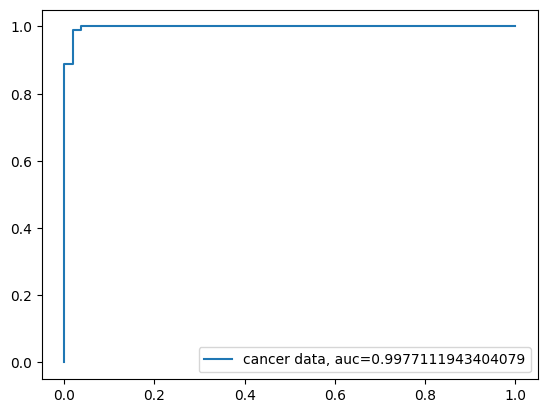

In [ ]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = skm.roc_curve(y_test,  y_pred_proba)
auc = skm.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="cancer data, auc="+str(auc))
plt.legend(loc=4)
plt.show()